In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [21]:
df = pd.read_csv('reviews.csv')

In [22]:
df.head()

,Title,Review,Date,Rating
0,Never seen the anime and still enjoyed it,I have to admit that I've never watched any of...,4 September 2023,8.0
1,Not My Kind of Show. But This I Loved.,I'm a 60yo man & old school like the The Marin...,4 September 2023,9.0
2,I'm Shocked By How Good This Is...,Every live action anime that I've briefly seen...,1 September 2023,9.0
3,See Netflix?? You CAN do it...,This is bar none one of the best live-action a...,4 September 2023,10.0
4,WE WANT SEASON 2,"Being a one piece fan myself, I was a bit inse...",31 August 2023,10.0


In [23]:
df.shape

(878, 4)

In [24]:
df.isnull().sum()

,0
Title,0
Review,0
Date,0
Rating,8


In [25]:
df.dropna(inplace=True)

In [26]:
df.isnull().sum()

,0
Title,0
Review,0
Date,0
Rating,0


In [27]:
df["Rating"].value_counts()

,count
Rating,
10.0,432
9.0,171
8.0,93
7.0,52
5.0,27
1.0,27
6.0,26
3.0,17
2.0,13


In [28]:
def classify_rating(r):
    if r >= 6:
        return 2
    elif r >= 4:
        return 1
    else:
        return 0

df["Rating_Class"] = df["Rating"].apply(classify_rating)

In [29]:
df

,Title,Review,Date,Rating,Rating_Class
0,Never seen the anime and still enjoyed it,I have to admit that I've never watched any of...,4 September 2023,8.0,2
1,Not My Kind of Show. But This I Loved.,I'm a 60yo man & old school like the The Marin...,4 September 2023,9.0,2
2,I'm Shocked By How Good This Is...,Every live action anime that I've briefly seen...,1 September 2023,9.0,2
3,See Netflix?? You CAN do it...,This is bar none one of the best live-action a...,4 September 2023,10.0,2
4,WE WANT SEASON 2,"Being a one piece fan myself, I was a bit inse...",31 August 2023,10.0,2
...,...,...,...,...,...
873,Most faithful and high quality adaptation sinc...,I haven't written a review in a very long time...,2 September 2023,10.0,2
874,Me and my son loving it! The best entertaining...,This is my first IMDb review.\n\nI've watched ...,1 September 2023,9.0,2
875,A very good adaptation to the famous anime,"An absolute gem! This show is a must-watch, an...",3 September 2023,10.0,2
876,This wonderful thing...,I recently dived (no pun intended) into the wo...,2 September 2023,10.0,2


In [30]:
X_train, X_test, y_train, y_test = train_test_split(df["Review"],df["Rating_Class"], test_size=0.2, random_state=123)

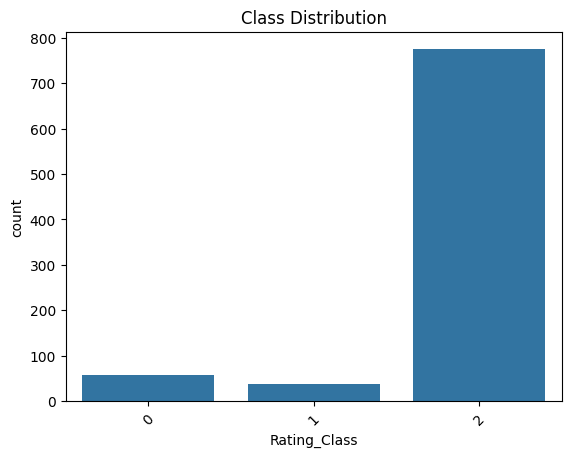

In [33]:
sns.countplot(x = df["Rating_Class"])
plt.title("Class Distribution")
plt.xticks(rotation = 45)
plt.show()

In [36]:
print(X_train)

755    As a longtime fan of the original manga, I sta...
102    There's so many reviews all the same 10/10 tha...
277    I've never watched the anime or read the manga...
816    The adaptation is really good!\n\nOnce you spo...
692    The One Piece Netflix live-action series is a ...
                             ...                        
98     As a fan of One piece anime, I was initially s...
324    The manga series which then became an anime TV...
384    So I finished the One Piece Live Action Series...
367    One Piece, based on popular manga and anime, i...
514    The effects are really well made.\n\nThe same ...
Name: Review, Length: 696, dtype: object


In [37]:
print(y_train)

755    2
102    1
277    2
816    2
692    2
      ..
98     2
324    0
384    2
367    2
514    2
Name: Rating_Class, Length: 696, dtype: int64


# **Data Preprocessing**

In [41]:
stop_words = set(stopwords.words('english'))

def preprocess(text):
    text = text.lower()
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in string.punctuation]
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

In [44]:
X_train['clean'] = X_train.apply(preprocess)
X_test['clean'] = X_test.apply(preprocess)

# **TF-IDF Vectorization**

In [45]:
vect = TfidfVectorizer()
X_train_vect = vect.fit_transform(X_train['clean'])
X_test_vect = vect.transform(X_test['clean'])

# **Training**

In [46]:
model = MultinomialNB()
model.fit(X_train_vect, y_train)

MultinomialNB()

# **Evaluation**

In [47]:
preds = model.predict(X_test_vect)
print("Validation Results: \n")
print(classification_report(y_test, preds))

Validation Results: 

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.00      0.00      0.00         7
           2       0.91      1.00      0.95       158

    accuracy                           0.91       174
   macro avg       0.30      0.33      0.32       174
weighted avg       0.82      0.91      0.86       174



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


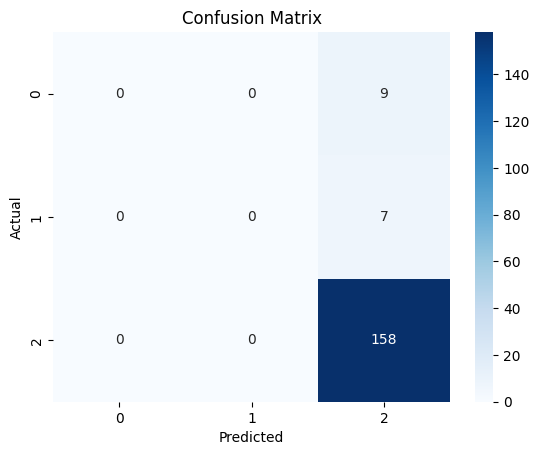

In [48]:
#Confusion Matrix
cm = confusion_matrix(y_test, preds, labels = model.classes_)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=model.classes_, yticklabels=model.classes_, cmap = "Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# **Prediction**

In [51]:
def predict_rating(review):
    cleaned = preprocess(review)
    cleaned_vect = vect.transform([cleaned])
    pred_class = model.predict(cleaned_vect)[0]
    if pred_class == 2:
        return "Positive"
    elif pred_class == 1:
        return "Neutral"
    elif pred_class == 0:
        return "Negative"


In [52]:
print(predict_rating("This product is amazing!"))
print(predict_rating("This product is terrible!"))
print(predict_rating("This product is okay."))

Positive
Positive
Positive
